In [1]:
from __future__ import print_function
from f4klib2 import *
import seaborn as sns
movs = loadMovids()
movs_length = loadLengths()

In [4]:
movid = movs[5]

idee = movid[0]
fname = movid[0].split("#")[0]
print(idee)

savepath = "/afs/inf.ed.ac.uk/group/project/F4KC/output/{0}/{1}/{2}".format(idee[0],idee[0:2],idee)
featurepath = "/afs/inf.ed.ac.uk/group/project/F4KC/features/{0}/{1}/{2}".format(idee[0],idee[0:2],idee)

#Load the video
time = datetime.now()
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid)

yhatsvm = np.zeros((frames,1,10))
    
if earlyRemoval(movid, frames):
    for i in range(frames):
        #Set probability of class 2 to 1.
        yhatsvm[i,0,1] = 1
elif not os.path.isfile(featurepath+".feif.npy"):
    for i in range(frames):
        #Set probability of class 7 to 1.
        yhatsvm[i,0,6] = 1
        #print("yes")
else: #Normal case
    features = np.load(featurepath+".pcaFeature.npy")
    feifmask = np.load(featurepath+".feif.npy")
    yhatsvm[np.bitwise_not(feifmask),0,6] = 1

000091a58183e0358d5c3f8716c8491a#201101151720


In [3]:
g,t = loadValidationSet(filta=37,split=2)
print(g.shape)
print(t.shape)

(424, 100)
(424,)


Using video_id: 13b00abf7ea757a4a4de1618c8411924#201103131800
Using movie, csv, sql paths: 
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/1/13/summary_13b00abf7ea757a4a4de1618c8411924#201103131800.avi
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/1/13/frame_info_13b00abf7ea757a4a4de1618c8411924#201103131800.txt
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/sqldump/1/13/13b00abf7ea757a4a4de1618c8411924#201103131800.txt
Video frame size: 640x480, camera_id: 37
Total frames in video: 961
961 out of 961, about 100% detection have a bounding box in sql.


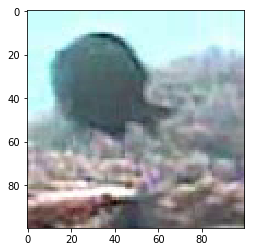

In [2]:
movid = movs[30599]
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid, print_info=True, print_time=False)

picker = 177
image1=(clip[picker])
thiscontour = getContour(contour[picker])
mask = np.full(image1.shape, 0, dtype=np.uint8)
cv2.fillPoly(mask, np.int32([thiscontour]), (255,)*3)
#image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2YUV)
#image2 = cv2.bitwise_and(image1,mask)
#image3 = copy.deepcopy(image2).astype(float)
#image3[:,:,0] = normalizeRGB(image2)[:,:,0]*256
plt.imshow(image1)
plt.show()

def spartialContrastiveNormalization1D(imagein, kernel):
    for i in range(3):
        mean = ndi.convolve(imagein[:,:,i], neighbourhood, mode='constant', cval=0.0,  output=np.float64)
        V = imagein[:,:,i] - mean
        S = np.sqrt(ndi.convolve(np.power(V, 2.0),kernel, mode='constant', cval=0.0,  output=np.float64))
        imagein[:,:,i] = V/S
    return imagein

# CNN

In [40]:
import lutorpy as lua
require('nn')
require('image')
    
meann = [[0.5, 0.5, 0.5],
         [0.39652687546177, 0.45261265063944, 0.42062426025794], #'N_SGD'
         [0.9249023692381,  0.92963844758093, 0.92607431571841], #'W_C_SGD'
         [0.048790299759605,0.052937559625764,0.049839084833519]]#'B_C_SGD'

stdd = [[0.25, 0.25, 0.25],
        [0.28132888018719, 0.30690810636064, 0.30367700787976],#'N_SGD'
        [0.21736589663274, 0.20606532102447, 0.21408039791867],#'W_C_SGD'
        [0.15689543246897, 0.16453823057925, 0.15784736844257]]#'B_C_SGD'

neighbourhood = image.gaussian1D(13)
normalization = nn.SpatialContrastiveNormalization(1, neighbourhood, 1)._float()

model1 = torch.load('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/lua/models/float/N_SGD.model.net')
fmodel1 = model1._float()
model2 = torch.load('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/lua/models/float/W_C_SGD.model.net')
fmodel2 = model2._float()
model3 = torch.load('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/lua/models/float/B_C_SGD.model.net')
fmodel3 = model3._float()
#print(fmodel)

In [78]:
#Numpy Array to Torch Tensor
image_N = clip[177]
#print(image_N[:10,:10,0])

image_N = cv2.cvtColor(image_N, cv2.COLOR_RGB2BGR)

#image_N = cv2.cvtColor(image_N, cv2.COLOR_BGR2YUV).astype(np.double)/255.0
#xt = torch.fromNumpyArray(np.transpose(image_N,(2,0,1)))._double()
xt = torch.fromNumpyArray(np.transpose(image_N,(2,0,1)).astype(np.double)/255.0)._float()
xt = image.rgb2yuv(xt)

for i in range(3):
    xt[i]._add(-meann[1][i])
    xt[i]._div(stdd[1][i])
    xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
#yt = fmodel1._forward(xt)
#yn = yt.asNumpyArray()
image_N = xt.asNumpyArray()
prin = torch.fromNumpyArray(image_N[0,:10,:10])
print(prin)

0.01 *
  0.8414  0.9425  1.4332  1.6526  2.0547  2.3309  0.5883  0.8460 -0.3591 -0.2589
  0.9930  1.0855  1.5652  1.7702  0.9243  1.1878 -0.5623 -0.3060 -1.5035 -1.3867
  1.3608  1.4390  1.9015  2.0882  1.2134  1.4665  0.8904  1.1534 -0.0263  0.1168
  0.8046  0.8644  1.3027  1.4638  0.1515  0.3884 -0.1939  0.0709 -2.4887 -2.3217
  1.6294  1.6649  0.9176  1.0425  0.8739  1.0839  1.3188  1.5732 -0.1650  0.0167
 -0.6020 -0.5953 -1.3841 -1.3014 -0.6875 -0.5083 -0.2933 -0.0558 -1.2221 -1.0344
  0.0557  0.0322  0.5334  0.5729  0.3472  0.4946  1.3470  1.5631  0.3865  0.5715
 -0.5674 -0.6232 -0.1668 -0.1712 -0.4337 -0.3181  0.5123  0.7044 -0.4862 -0.3069
 -1.9818 -0.6755  0.3261  1.6707  2.3454  1.0302  0.2800 -0.9505 -0.7592 -1.9671
 -1.0349  0.2453  1.2075  2.5127  3.1504  1.7984  1.0195 -0.2362  2.7446  1.5725
[torch.FloatTensor of size 10x10]



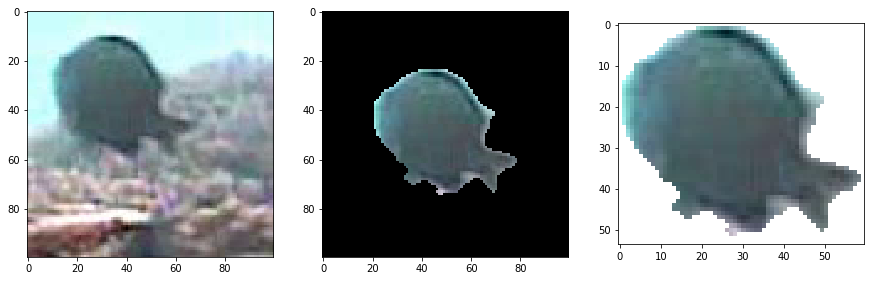

In [41]:
f = 177

image_N = clip[f]

image_contour = getContour(contour[f])
mask = np.full(image_N.shape, 0, dtype=np.uint8)
cv2.fillPoly(mask, np.int32([image_contour]), (255,)*3)

w, h = (89 - np.max(image_contour,0)) / 2

image_BC = cv2.bitwise_and(mask,image_N)
image_WC = cv2.bitwise_or(cv2.bitwise_not(mask),image_N)

#image_N = np.roll(image_N, w, axis=1)
#image_N = np.roll(image_N, h, axis=0)
image_BC = np.roll(image_BC, w, axis=1)
image_BC = np.roll(image_BC, h, axis=0)
image_WC = np.roll(image_WC, w, axis=1)
image_WC = np.roll(image_WC, h, axis=0)

plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image_N)
plt.subplot(1,3,2)
plt.imshow(image_BC)
plt.subplot(1,3,3)
plt.imshow(image_WC[23:77,20:80,:])
plt.show()

In [8]:
cv2.CV_IMWRITE_JPEG_QUALITY = 100

for f in range(frames):
    image_N = clip[f]
    cv2.imwrite("/afs/inf.ed.ac.uk/user/s14/s1413557/Desktop/shite/" + str(f) + ".jpg", image_N)

In [25]:
print(clip[177][:10,:10,0])

[[203 203 203 203 203 203 203 203 203 203]
 [203 203 203 203 203 203 203 203 203 203]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [203 203 203 203 203 203 203 203 203 203]
 [205 205 205 205 205 205 205 205 205 205]]


[[203 203 203 203 203 203 203 203 203 203]
 [203 203 203 203 203 203 203 203 203 203]
 [204 204 204 204 204 204 204 204 202 202]
 [204 204 204 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [202 202 202 202 202 202 202 202 202 202]
 [201 201 201 201 203 203 203 203 203 203]
 [205 205 205 205 205 205 205 205 205 205]]


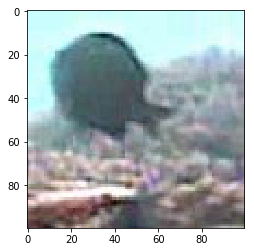

In [26]:
image_N = cv2.imread("/afs/inf.ed.ac.uk/user/s14/s1413557/Desktop/shite/" + str(177) + ".jpg")
#image_N = cv2.cvtColor(image_N, cv2.COLOR_RGB2BGR)
print(image_N[:10,:10,0])
plt.imshow(image_N)
plt.show()

In [48]:
time = datetime.now()
yhat = np.zeros((3,frames))

cvtInPython = True
for f in range(frames):
    image_N = clip[f]
    #image_N = cv2.imread("/afs/inf.ed.ac.uk/user/s14/s1413557/Desktop/shite/" + str(f) + ".jpg")
    image_N = cv2.cvtColor(image_N, cv2.COLOR_RGB2BGR)
    
    #Mask Image
    image_contour = getContour(contour[f])
    mask = np.full(image_N.shape, 0, dtype=np.uint8)
    cv2.fillPoly(mask, np.int32([image_contour]), (255,)*3)
    image_BC = cv2.bitwise_and(mask,image_N)
    image_WC = cv2.bitwise_or(cv2.bitwise_not(mask),image_N)
    
    #Center Image
    w, h = (89 - np.max(image_contour,0)) / 2
    image_BC = np.roll(image_BC, w, axis=1)
    image_BC = np.roll(image_BC, h, axis=0)
    image_WC = np.roll(image_WC, w, axis=1)
    image_WC = np.roll(image_WC, h, axis=0)

    #Image_N
    if cvtInPython:
        image_N = cv2.cvtColor(image_N, cv2.COLOR_BGR2YUV).astype(np.double)/255.0
        xt = torch.fromNumpyArray(np.transpose(image_N,(2,0,1)))._float()
    else:
        xt = torch.fromNumpyArray(np.transpose(image_N,(2,0,1)).astype(np.double)/255.0)._float()
        xt = image.rgb2yuv(xt)
    for i in range(3):
        xt[i]._add(-meann[1][i])
        xt[i]._div(stdd[1][i])
        xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
    yt = fmodel1._forward(xt)
    yn = yt.asNumpyArray()
    yhat[0,f] = np.argmax(yn) + 1
    
    del xt,yt,yn
    
    #Image_W_C
    if cvtInPython:
        image_WC = cv2.cvtColor(image_WC, cv2.COLOR_BGR2YUV).astype(np.double)/255.0
        xt = torch.fromNumpyArray(np.transpose(image_WC,(2,0,1)))._float()
    else:
        xt = torch.fromNumpyArray(np.transpose(image_WC,(2,0,1)).astype(np.double)/255.0)._float()
        xt = image.rgb2yuv(xt)
    for i in range(3):
        xt[i]._add(-meann[2][i])
        xt[i]._div(stdd[2][i])
        xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
    yt = fmodel2._forward(xt)
    yn = yt.asNumpyArray()
    yhat[1,f] = np.argmax(yn) + 1
    
    del xt,yt,yn
    
    #Image_B_C
    if cvtInPython:
        image_BC = cv2.cvtColor(image_BC, cv2.COLOR_BGR2YUV).astype(np.double)/255.0
        xt = torch.fromNumpyArray(np.transpose(image_BC,(2,0,1)))._float()
    else:
        xt = torch.fromNumpyArray(np.transpose(image_BC,(2,0,1)).astype(np.double)/255.0)._float()
        xt = image.rgb2yuv(xt)
    for i in range(3):
        xt[i]._add(-meann[3][i])
        xt[i]._div(stdd[3][i])
        xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
    yt = fmodel3._forward(xt)
    yn = yt.asNumpyArray()
    yhat[2,f] = np.argmax(yn) + 1
    
    del xt,yt,yn
    
    print("Frame {1} Took total of {0}".format(datetime.now() - time,f),end='\r')
print("Processing {1} frames Took total of {0}".format(datetime.now() - time,frames))

Processing 961 frames Took total of 0:00:30.192081


In [49]:
np.save("/afs/inf.ed.ac.uk/user/s14/s1413557/Desktop/shite.npy",yhat)

In [99]:
#print(xt)
print(xt._type())
print(yn)
print(np.round(np.exp(yn),2))
mattrant = """
So we need to:

1. Convert RGB -> YUV data.lua / preprocess_data_yuv_normalize image.rgb2yuv
2. Normalise against constants from training data | the model chosen
3. Perform per-channel Gaussian filtering to reduce noise
4. Resultant 64x64x3 matrix is the input

Questions:

1. Is the model broken? Redoing the same input operation leads to different results. Causes?
  1, Model is broken
    1. The design?
    2. The library?
  2. Is this a problem with the lua/python interface?
    1. Install lua image
    2. Test image stuff there and manually feed model with normalized input via preproces... a few times
    
"""

torch.DoubleTensor
[-7.48812076e+00 -1.44871926e+01 -1.88712670e+01 -1.02381896e+01
 -8.31644465e+00 -4.98956965e+00 -8.62935650e-03 -7.13746904e+00
 -1.32962549e+01 -8.82683005e+00]
[0.   0.   0.   0.   0.   0.01 0.99 0.   0.   0.  ]


# Decision Tree / Random Forest on result

In [23]:
movs = loadMovids()
movs_length = loadLengths()

gtss = np.array([])
cnnout = np.array([]).reshape(0,3,10)

idl = np.hstack((np.arange(30598,30633),np.arange(30634,30638)))

for i in idl:
    if movs_length[i] != 0:
        idee = movs[i][0]
        savepath = "/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/CNNoutput/{0}/{1}/{2}"
        savepath = savepath.format(idee[0],idee[0:2],idee)
        
        cnnout = np.vstack((cnnout,np.load(savepath+".CNN.npy")))
        try:
            gts = loadGT(idee, movs_length[i], partial=True)
        except:
            gts = loadGT(idee, movs_length[i], partial=False)
        gtss = np.hstack((gtss,gts))

gtss = gtss.astype(int)
mask = gtss != 0

cnnout = cnnout[mask,:,:]
gtss = gtss[mask]

print(cnnout.shape)
print(gtss.shape)

(61101, 3, 10)
(61101,)


In [22]:
path = '/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/svmObject'
pca = pickle.load(open(path, 'rb'))
f, t = loadTrainDataSet()
print(f.shape)
print(t.shape)

(61101, 100)
(61101,)


In [24]:
lentsu = len(t)
batch = lentsu / 100
mod = lentsu % 100

result = np.zeros((lentsu,10))

time = datetime.now()

for i in range(batch):
    pred = pca.predict_proba(f[i*100:(i+1)*100,:30])
    result[i*100:(i+1)*100,:] = pred
    print("Frame {1}00 Took total of {0}".format(datetime.now() - time,i+1),end='\r')

if mod != 0:
    result[batch*100:] = pca.predict_proba(f[batch*100:,:30])

print("Processing All {1} frames Took total of {0}".format(datetime.now() - time,lentsu))
    

Processing All 61101 frames Took total of 0:03:24.134199


In [28]:
np.save("/afs/inf.ed.ac.uk/user/s14/s1413557/Desktop/shite2",result)

In [30]:
result = np.load("/afs/inf.ed.ac.uk/user/s14/s1413557/Desktop/shite2.npy")

In [37]:
print(result.shape)
print(cnnout.shape)
final_result = np.hstack((result.reshape(61101,1,10),cnnout))
print(final_result.shape)
final_result = final_result.reshape(61101,40)

(61101, 10)
(61101, 3, 10)
(61101, 4, 10)


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,n_jobs=4,class_weight='balanced').fit(final_result,gtss)

In [41]:
gtss = np.array([])
cnnout = np.array([]).reshape(0,3,10)
mov_identifier = np.array([])
mov_identifier2 = np.array([])


idl = np.array([396853,396857,396859,396860,396866,396876,396880,396892,396895,396900,
                396823,396829,396843,396852,396862,396870,396882,396885,396889,396894,
                396856,396863,396864,396868,396869,396893,396896,396897,396898,396899,
                396624,396639,396662,396675,396728,396737,396759,396777,396790,396804,
                396750,396760,396767,396784,396792,396793,396872,396877,396878,396886,
                396824,396836,396839,396854,396858,396861,396865,396871,396874,396884,
                396720,396733,396778,396815,396820,396827,396830,396834,396879,396890,
                396840,396841,396845,396849,396850,396851,396867,396883,396887,396891,
                396785,396802,396811,396822,396838,396844,396873,396875,396881,396888])

for i in idl:
    if movs_length[i] != 0:
        idee = movs[i][0]
        savepath = "/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/CNNoutput/{0}/{1}/{2}"
        savepath = savepath.format(idee[0],idee[0:2],idee)
        
        cnno = np.load(savepath+".CNN.npy")
        cnnout = np.vstack((cnnout,cnno))
        if movs_length[i] >= 100:
            gts = loadNewGT(movs[i][0], movs_length[i], validation=True, spacing=(movs_length[i] / 100))
        else:
            gts = loadNewGT(movs[i][0], movs_length[i], validation=True, spacing=1)
        gtss = np.hstack((gtss,gts))
        
        mov_identifier = np.hstack((mov_identifier,np.array([i]*len(gts))))
        mov_identifier2 = np.hstack((mov_identifier2,range(len(gts))))

mask = gtss != None
cnnout = cnnout[mask,:,:]
gtss = gtss[mask]
mov_identifier = mov_identifier[mask]
mov_identifier2 = mov_identifier2[mask]
gtss = gtss.astype(int)

print(cnnout.shape)
print(gtss.shape)

(7955, 3, 10)
(7955,)


In [42]:
f, t = loadValidationSet()
t = t.astype(int)

In [43]:
lentsu = len(t)
batch = lentsu / 100
mod = lentsu % 100

result = np.zeros((lentsu,10))

time = datetime.now()

for i in range(batch):
    pred = pca.predict_proba(f[i*100:(i+1)*100,:30])
    result[i*100:(i+1)*100,:] = pred
    print("Frame {1}00 Took total of {0}".format(datetime.now() - time,i+1),end='\r')

if mod != 0:
    result[batch*100:] = pca.predict_proba(f[batch*100:,:30])

print("Processing All {1} frames Took total of {0}".format(datetime.now() - time,lentsu))

Processing All 7955 frames Took total of 0:00:26.410117


In [44]:
print(result.shape)
print(cnnout.shape)
final_result = np.hstack((result.reshape(-1,1,10),cnnout))
print(final_result.shape)
final_result = final_result.reshape(-1,40)

(7955, 10)
(7955, 3, 10)
(7955, 4, 10)


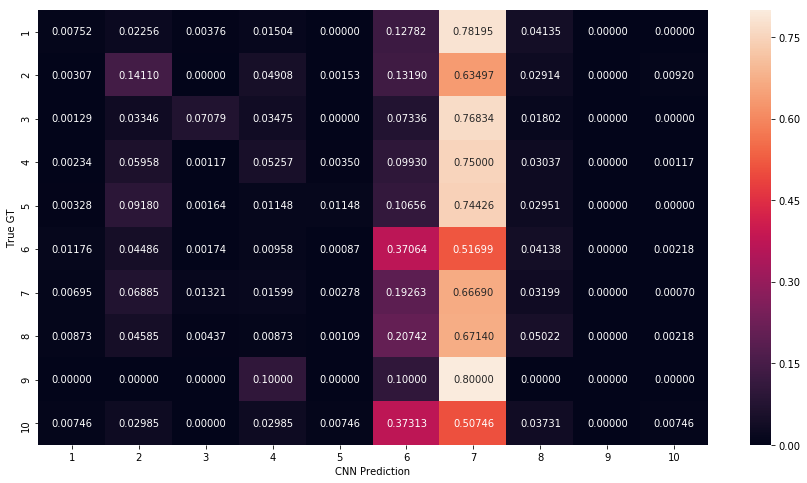

In [46]:
rfout = rf.predict(final_result)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(t,rfout,labels=np.arange(1,11))
cm = cm*1.0/np.sum(cm,1).reshape(10,1)
plt.figure(figsize=(15,8))
sns.heatmap(cm,xticklabels=np.arange(1,11), yticklabels=np.arange(1,11),annot=True,fmt='.5f')
plt.xlabel("CNN Prediction")
plt.ylabel("True GT")
plt.show()

# Random Forest

True Positive Rate: 0.455263157895
True Negative Rate: 0.0539473684211
False Positive Rate: 0.0171052631579
False Negative Rate: 0.473684210526

Accuracy: 0.509210526316
Precision: 0.963788300836

Good Fish Kept Rate: 0.490084985836
Good Fish Lost Rate: 0.509915014164

None Fish Kept Rate: 0.240740740741
None Fish Lost Rate: 0.759259259259


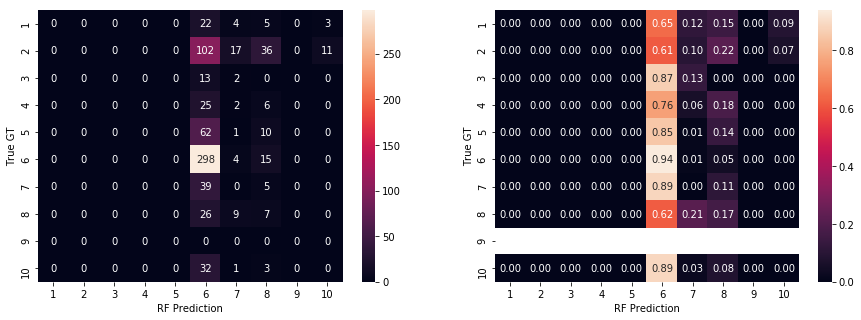

In [21]:
from sklearn.ensemble import RandomForestClassifier

site = 46

features,targets = loadTrainDataSet(includeNew=True,filta=site)
targets = targets.astype(int)

rf = RandomForestClassifier(n_estimators=100,n_jobs=4,class_weight='balanced').fit(features,targets)

f,t = loadValidationSet(filta=site)
t = t.astype(int)
y = rf.predict(f)
targets = targets.astype(int)

validateResult(t,y,yrange=[6,8],grange=[6,8])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(t,y,labels=np.arange(1,11))
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.heatmap(cm,xticklabels=np.arange(1,11), yticklabels=np.arange(1,11),annot=True,fmt='.0f')
plt.xlabel("RF Prediction")
plt.ylabel("True GT")
plt.subplot(122)
cm = cm*1.0/np.sum(cm,1).reshape(10,1)
sns.heatmap(cm,xticklabels=np.arange(1,11), yticklabels=np.arange(1,11),annot=True,fmt='.2f')
plt.xlabel("RF Prediction")
plt.ylabel("True GT")
plt.show()

# PCA
---

In [6]:
ranges = loadRange()
pca = loadPCA(ranges)

In [7]:
component = pca.components_
eigens = pca.explained_variance_
eigenratio = pca.explained_variance_ratio_

In [8]:
for i in range(len(eigens)):
    if np.sum(eigenratio[:i+1]) > 0.90:
        print(i)
        break

88


In [9]:
print(np.sum(eigenratio>0.01))

15


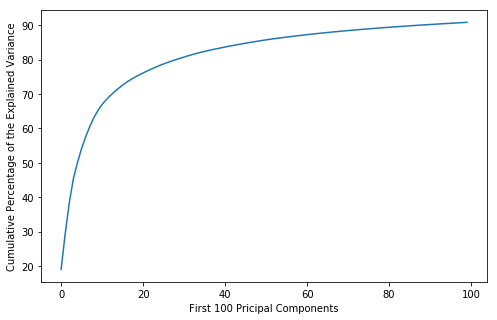

In [18]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(eigenratio[:100])*100)
ax = plt.gca()
#ax.set_yscale("log")
ax.set_ylabel("Cumulative Percentage of the Explained Variance")
ax.set_xlabel("First 100 Pricipal Components")
plt.show()

In [25]:
print(np.cumsum(eigenratio[:100])[88])

0.9000844762209111


In [11]:
feature_names = featureNames()
component = component[:50,:]
pt = np.max(np.abs(component),0)
ptall = np.max(np.abs(component))
throw = pt < (ptall*0.01)
throwindex = np.arange(0,2655)[throw]
throwfeature = np.array(feature_names)[throw]

fr = np.vstack((pt/ptall,feature_names))

print(len(throwindex))
print(fr[:,2631:2635])
#print(throwindex+1)
#print(throwfeature)

762
[['0.004270906825123341' '0.0005375407389302384' '0.00010515964833192855'
  '7.575908102231019e-05']
 ['Erraticity 1' 'Erraticity 2' 'Erraticity 3' 'Erraticity 4']]


In [ ]:
head = 0
end = 10
plt.subplots(end-head,1,figsize=(15,(end-head)*5))
for i in np.arange(head,end):
    plt.subplot(end-head,1,i-head+1)
    plt.plot(component[i])
    plt.axvline(x=254.5,color="red")
    plt.axvline(x=509.5,color="red")
    plt.axvline(x=764.5,color="red")
    plt.axvline(x=764.5,color="red")
    plt.axvline(x=819.5,color="red")
    plt.axvline(x=874.5,color="red")
    plt.axvline(x=929.5,color="red")
    plt.axvline(x=943.5,color="red")
    plt.axvline(x=1663.5,color="red")
    plt.axvline(x=1705.5,color="red")
    plt.axvline(x=2385.5,color="red")
    plt.axvline(x=2400.5,color="red")
    plt.axvline(x=2560.5,color="red")
    plt.axvline(x=2625.5,color="red")
plt.show()

# Load Dataset
---

In [27]:
features,targets = loadTrainDataSet(includeNew=False)#,filta="41")
print(features.shape)
print(targets.shape)
print(targets.reshape(-1,1).shape)

counts = np.histogram(targets,np.arange(0,12))[0]
for i in np.arange(1,11):
    print("Class {0}: {1}".format(i,counts[i]))

(61101, 100)
(61101,)
(61101, 1)
Class 1: 998
Class 2: 7260
Class 3: 2879
Class 4: 1973
Class 5: 1726
Class 6: 16869
Class 7: 16734
Class 8: 9786
Class 9: 255
Class 10: 2621


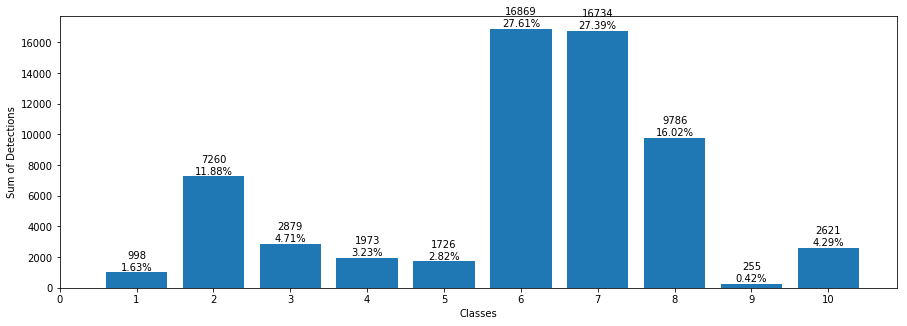

In [28]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(1,11),counts[1:11])
ax = plt.gca()
ax.set_xticks(np.arange(11))
ax.set_xlabel("Classes")
ax.set_ylabel("Sum of Detections")
#ax.set_yticks(np.arange(0,22000,2000))

rects = ax.patches
labels = ["{0:.2f}%".format(counts[i+1]*100.0/sum(counts)) for i in xrange(len(rects))]
labels2 = [str(counts[i+1]) for i in xrange(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
for rect, label in zip(rects, labels2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 800, label, ha='center', va='bottom')
plt.show()

In [9]:
X = features[:,:10]
y = targets.astype('int') 